## Learning objectives of this notebook

1. Load multiple DARTS simulations using pandas
2. Compile data for all simulations in pandas
3. Plot data using seaborn
4. Pre-treat data for economic analysis
5. Compute LCOH


In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [99]:
# Load our simulation output data

# get all Excel files
flist = [os.path.join(dp, n) for dp, dn, fn in os.walk(os.getcwd())
            for n in fn
            if n.endswith('.xlsx')
            and os.path.isfile(os.path.join(dp, n))]


In [100]:
flist


['D:\\PyCharm\\DGC_econ\\het_along.xlsx',
 'D:\\PyCharm\\DGC_econ\\het_cross.xlsx',
 'D:\\PyCharm\\DGC_econ\\hom.xlsx',
 'D:\\PyCharm\\DGC_econ\\hom_oub.xlsx']

In [101]:
# load example simulation data
data = pd.read_excel(flist[0])
data

,Unnamed: 0,PRD : p 2 reservoir P (bar),INJ : p 1 c 1 rate (Kmol/day),INJ : c 0 rate (Kmol/day),INJ : p 0 c 0 rate (Kmol/day),INJ : temperature (K),time,INJ : p 1 c 0 rate (Kmol/day),INJ : c 1 rate (Kmol/day),INJ : p 0 c 1 rate (Kmol/day),...,PRD : p 0 c 0 rate (Kmol/day),PRD : p 1 c 0 rate (Kmol/day),PRD : p 0 c 1 rate (Kmol/day),PRD : p 0 reservoir P (bar),PRD : p 3 c 1 rate (Kmol/day),PRD : p 2 c 0 rate (Kmol/day),PRD : p 4 c 0 rate (Kmol/day),PRD : p 4 reservoir P (bar),PRD : p 4 c 1 rate (Kmol/day),PRD : BHP (bar)
0,0,197.670535,69565.315160,1.594902e+09,881.576786,300.0,0.001,2.787063e+08,398088.706395,308537.874379,...,-550.700419,-387.695835,-192736.400525,197.559129,-165025.205948,-503.482633,-329.575591,198.051574,-115346.222441,193.769823
1,1,194.932887,80873.970966,1.594861e+09,1020.474130,300.0,365.001,3.240082e+08,398084.460517,357148.696930,...,-544.894494,-387.550607,-190698.090008,194.786527,-165723.273763,-502.850936,-331.890794,195.348450,-116153.369809,191.036960
2,2,194.896227,80802.584853,1.594861e+09,1021.434813,300.0,730.001,3.237230e+08,398083.503157,357485.097330,...,-544.833317,-387.516388,-190675.901100,194.749965,-165703.353901,-502.783813,-331.859977,195.311907,-116142.432968,191.000819
3,3,194.914016,80782.947954,1.594868e+09,1021.796557,300.0,1095.001,3.236466e+08,398082.416688,357612.201942,...,-544.956381,-387.600363,-190719.112405,194.767756,-165740.866330,-502.892852,-331.938047,195.329865,-116169.905863,191.017763
4,4,194.940320,80778.552558,1.594877e+09,1021.947867,300.0,1460.001,3.236317e+08,398081.314210,357665.741431,...,-545.342071,-387.867240,-190854.409764,194.794004,-165857.349079,-503.242601,-332.176388,195.356554,-116253.525194,191.041357
5,5,194.967304,80778.957648,1.594887e+09,1021.978341,300.0,1825.001,3.236361e+08,398080.218263,357677.020091,...,-546.096977,-388.394063,-191118.973765,194.820857,-166083.614125,-503.929949,-332.640069,195.384235,-116416.027340,191.063016
6,6,194.993180,80781.191345,1.594897e+09,1021.942326,300.0,2190.001,3.236480e+08,398079.123978,357665.047001,...,-547.289403,-389.226268,-191536.687696,194.846551,-166437.180864,-505.012333,-333.370826,195.411215,-116672.013315,191.080505
7,7,195.017652,80784.210942,1.594907e+09,1021.870642,300.0,2555.001,3.236631e+08,398078.027269,357640.604264,...,-548.921036,-390.371648,-192108.136918,194.870733,-166915.308148,-506.498780,-334.370563,195.437154,-117022.150345,191.093460
8,8,195.040941,80787.567802,1.594918e+09,1021.780327,300.0,2920.001,3.236796e+08,398076.927647,357609.652039,...,-550.940775,-391.793741,-192815.445977,194.893620,-167500.312297,-508.344422,-335.606930,195.462203,-117455.118509,191.102449
9,9,195.063466,80791.048297,1.594929e+09,1021.680584,300.0,3285.001,3.236966e+08,398075.826137,357575.407189,...,-553.252949,-393.411269,-193625.121401,194.915822,-168151.622151,-510.439301,-337.019681,195.486844,-117949.831111,191.108741


In [102]:
dfs = []
for file in flist:
    df = pd.read_excel(file)
    df['Simulation'] = file.split(os.sep)[-1].split('.xlsx')[0]
    dfs.append(df)


In [103]:
# compile single dataframe
data = pd.concat(dfs)

In [104]:
# reset index to avoid duplicate entries
data.reset_index(drop=True, inplace=True)

In [105]:
# check that we have the simulations as expected
data['Simulation'].unique()

array(['het_along', 'het_cross', 'hom', 'hom_oub'], dtype=object)

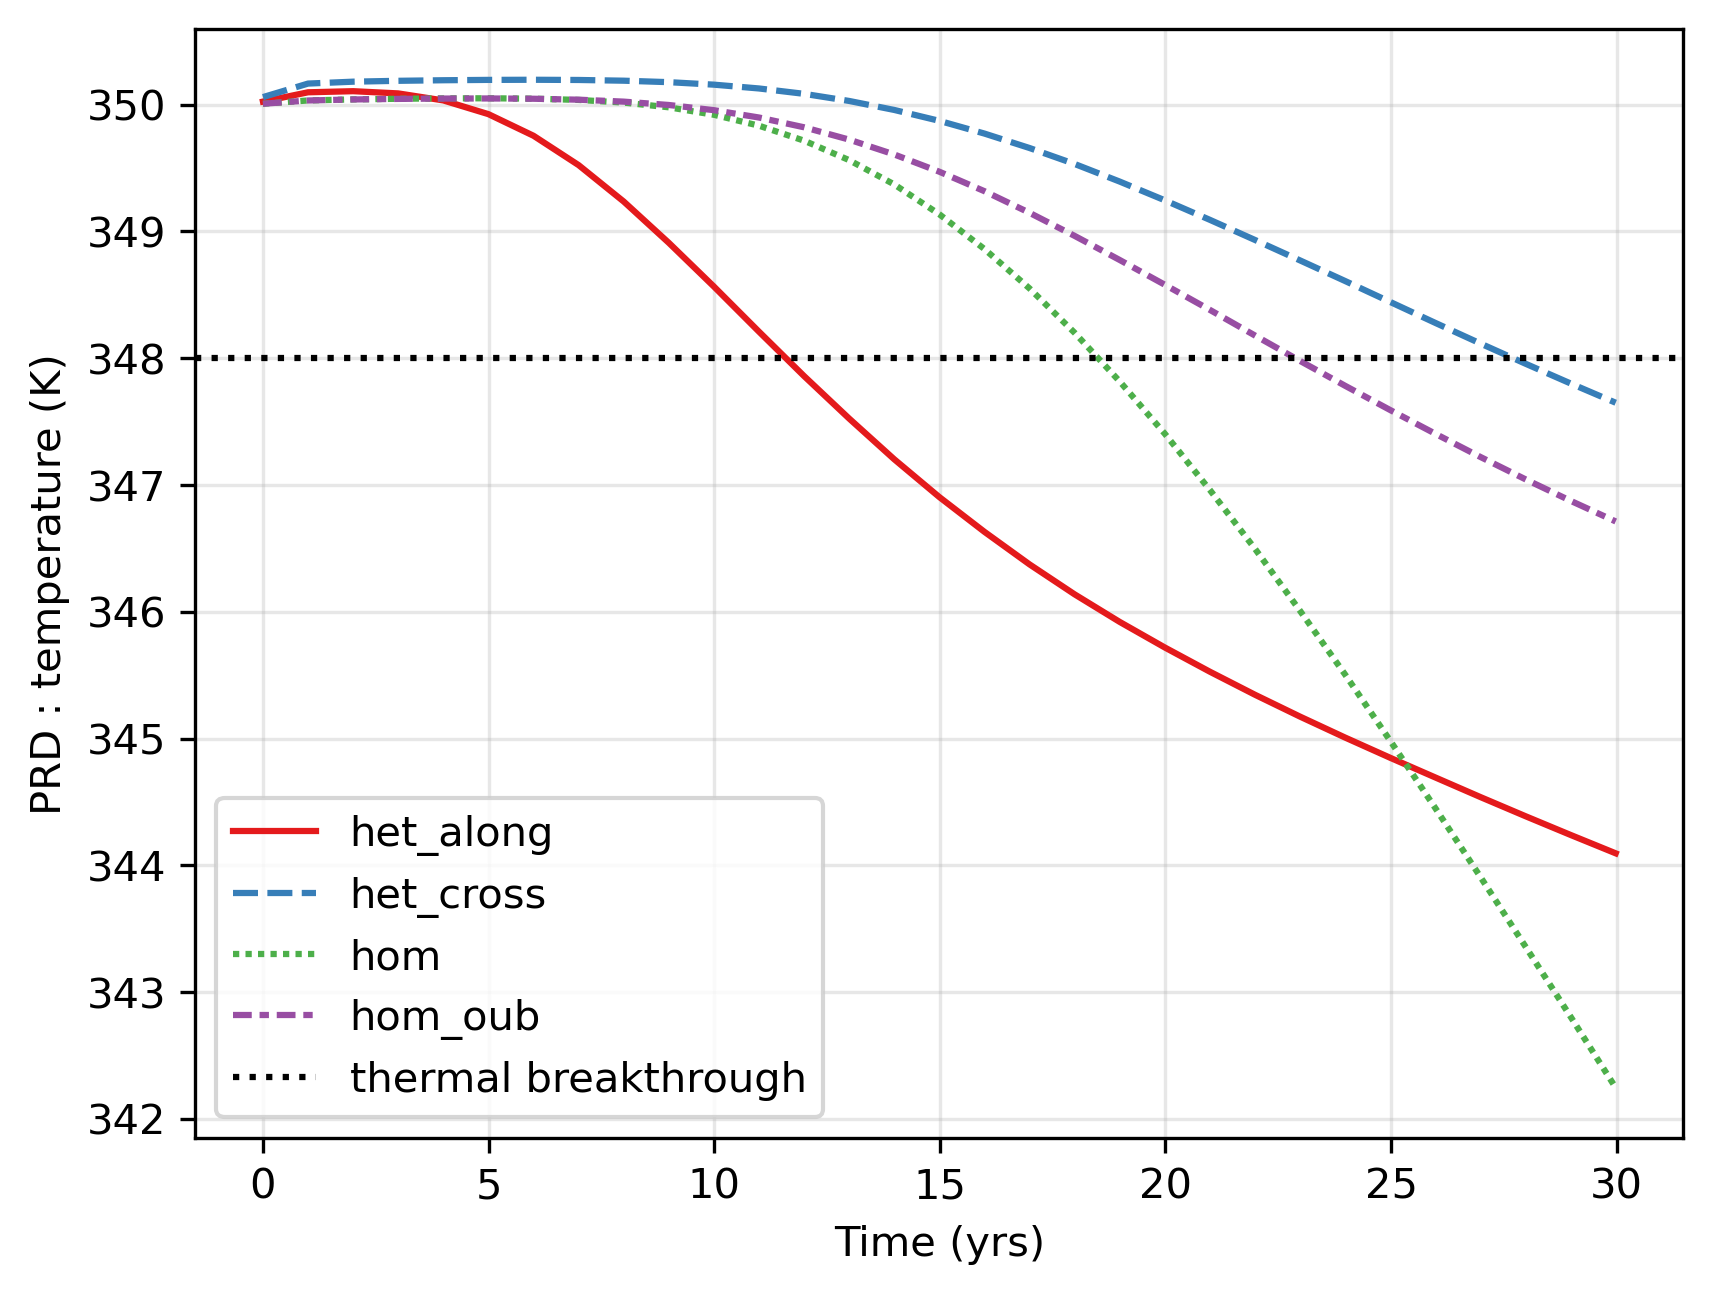

In [106]:
data['Time (yrs)'] = data['time'] / 365.25
fig, ax = plt.subplots(1,1, dpi=300)
sns.lineplot(x='Time (yrs)', y='PRD : temperature (K)', 
             hue='Simulation',  
             style='Simulation',
             data=data, 
             palette='Set1', 
             ax=ax)
ax.axhline(348, linestyle=':', label='thermal breakthrough', color='k')
ax.legend()
ax.grid(alpha=0.3)

In [107]:
# load example simulation data
data = pd.read_excel(flist[0])
data

,Unnamed: 0,PRD : p 2 reservoir P (bar),INJ : p 1 c 1 rate (Kmol/day),INJ : c 0 rate (Kmol/day),INJ : p 0 c 0 rate (Kmol/day),INJ : temperature (K),time,INJ : p 1 c 0 rate (Kmol/day),INJ : c 1 rate (Kmol/day),INJ : p 0 c 1 rate (Kmol/day),...,PRD : p 0 c 0 rate (Kmol/day),PRD : p 1 c 0 rate (Kmol/day),PRD : p 0 c 1 rate (Kmol/day),PRD : p 0 reservoir P (bar),PRD : p 3 c 1 rate (Kmol/day),PRD : p 2 c 0 rate (Kmol/day),PRD : p 4 c 0 rate (Kmol/day),PRD : p 4 reservoir P (bar),PRD : p 4 c 1 rate (Kmol/day),PRD : BHP (bar)
0,0,197.670535,69565.315160,1.594902e+09,881.576786,300.0,0.001,2.787063e+08,398088.706395,308537.874379,...,-550.700419,-387.695835,-192736.400525,197.559129,-165025.205948,-503.482633,-329.575591,198.051574,-115346.222441,193.769823
1,1,194.932887,80873.970966,1.594861e+09,1020.474130,300.0,365.001,3.240082e+08,398084.460517,357148.696930,...,-544.894494,-387.550607,-190698.090008,194.786527,-165723.273763,-502.850936,-331.890794,195.348450,-116153.369809,191.036960
2,2,194.896227,80802.584853,1.594861e+09,1021.434813,300.0,730.001,3.237230e+08,398083.503157,357485.097330,...,-544.833317,-387.516388,-190675.901100,194.749965,-165703.353901,-502.783813,-331.859977,195.311907,-116142.432968,191.000819
3,3,194.914016,80782.947954,1.594868e+09,1021.796557,300.0,1095.001,3.236466e+08,398082.416688,357612.201942,...,-544.956381,-387.600363,-190719.112405,194.767756,-165740.866330,-502.892852,-331.938047,195.329865,-116169.905863,191.017763
4,4,194.940320,80778.552558,1.594877e+09,1021.947867,300.0,1460.001,3.236317e+08,398081.314210,357665.741431,...,-545.342071,-387.867240,-190854.409764,194.794004,-165857.349079,-503.242601,-332.176388,195.356554,-116253.525194,191.041357
5,5,194.967304,80778.957648,1.594887e+09,1021.978341,300.0,1825.001,3.236361e+08,398080.218263,357677.020091,...,-546.096977,-388.394063,-191118.973765,194.820857,-166083.614125,-503.929949,-332.640069,195.384235,-116416.027340,191.063016
6,6,194.993180,80781.191345,1.594897e+09,1021.942326,300.0,2190.001,3.236480e+08,398079.123978,357665.047001,...,-547.289403,-389.226268,-191536.687696,194.846551,-166437.180864,-505.012333,-333.370826,195.411215,-116672.013315,191.080505
7,7,195.017652,80784.210942,1.594907e+09,1021.870642,300.0,2555.001,3.236631e+08,398078.027269,357640.604264,...,-548.921036,-390.371648,-192108.136918,194.870733,-166915.308148,-506.498780,-334.370563,195.437154,-117022.150345,191.093460
8,8,195.040941,80787.567802,1.594918e+09,1021.780327,300.0,2920.001,3.236796e+08,398076.927647,357609.652039,...,-550.940775,-391.793741,-192815.445977,194.893620,-167500.312297,-508.344422,-335.606930,195.462203,-117455.118509,191.102449
9,9,195.063466,80791.048297,1.594929e+09,1021.680584,300.0,3285.001,3.236966e+08,398075.826137,357575.407189,...,-553.252949,-393.411269,-193625.121401,194.915822,-168151.622151,-510.439301,-337.019681,195.486844,-117949.831111,191.108741


In [108]:
# Check available columns in the data
data.columns.tolist()

['Unnamed: 0',
 'PRD : p 2 reservoir P (bar)',
 'INJ : p 1 c 1 rate (Kmol/day)',
 'INJ : c 0 rate (Kmol/day)',
 'INJ : p 0 c 0 rate (Kmol/day)',
 'INJ : temperature (K)',
 'time',
 'INJ : p 1 c 0 rate (Kmol/day)',
 'INJ : c 1 rate (Kmol/day)',
 'INJ : p 0 c 1 rate (Kmol/day)',
 'PRD : p 3 reservoir P (bar)',
 'INJ : water rate (m3/day)',
 'INJ : p 1 reservoir P (bar)',
 'INJ : steam rate (m3/day)',
 'PRD : p 1 reservoir P (bar)',
 'INJ : energy (kJ/day)',
 'INJ : p 0 reservoir P (bar)',
 'FIPS c 0 (kmol)',
 'INJ : p 3 reservoir P (bar)',
 'INJ : p 3 c 1 rate (Kmol/day)',
 'INJ : p 2 c 0 rate (Kmol/day)',
 'INJ : p 3 c 0 rate (Kmol/day)',
 'INJ : p 2 c 1 rate (Kmol/day)',
 'PRD : temperature (K)',
 'INJ : p 2 reservoir P (bar)',
 'INJ : BHP (bar)',
 'INJ : p 4 c 0 rate (Kmol/day)',
 'INJ : p 4 c 1 rate (Kmol/day)',
 'INJ : p 4 reservoir P (bar)',
 'PRD : water rate (m3/day)',
 'PRD : steam rate (m3/day)',
 'PRD : p 3 c 0 rate (Kmol/day)',
 'PRD : p 2 c 1 rate (Kmol/day)',
 'PRD : energy

In [109]:
# list the collumn names that should be removed
press_gridcells = data.filter(like='reservoir').columns.tolist()
chem_cols = data.filter(like='Kmol').columns.tolist()

# remove collumns from data
data.drop(columns=press_gridcells + chem_cols, inplace=True)


# add time in years
data['Time (yrs)'] = data['time'] / 365.25

data.columns.tolist()

['Unnamed: 0',
 'INJ : temperature (K)',
 'time',
 'INJ : water rate (m3/day)',
 'INJ : steam rate (m3/day)',
 'INJ : energy (kJ/day)',
 'FIPS c 0 (kmol)',
 'PRD : temperature (K)',
 'INJ : BHP (bar)',
 'PRD : water rate (m3/day)',
 'PRD : steam rate (m3/day)',
 'PRD : energy (kJ/day)',
 'PRD : BHP (bar)',
 'Time (yrs)']

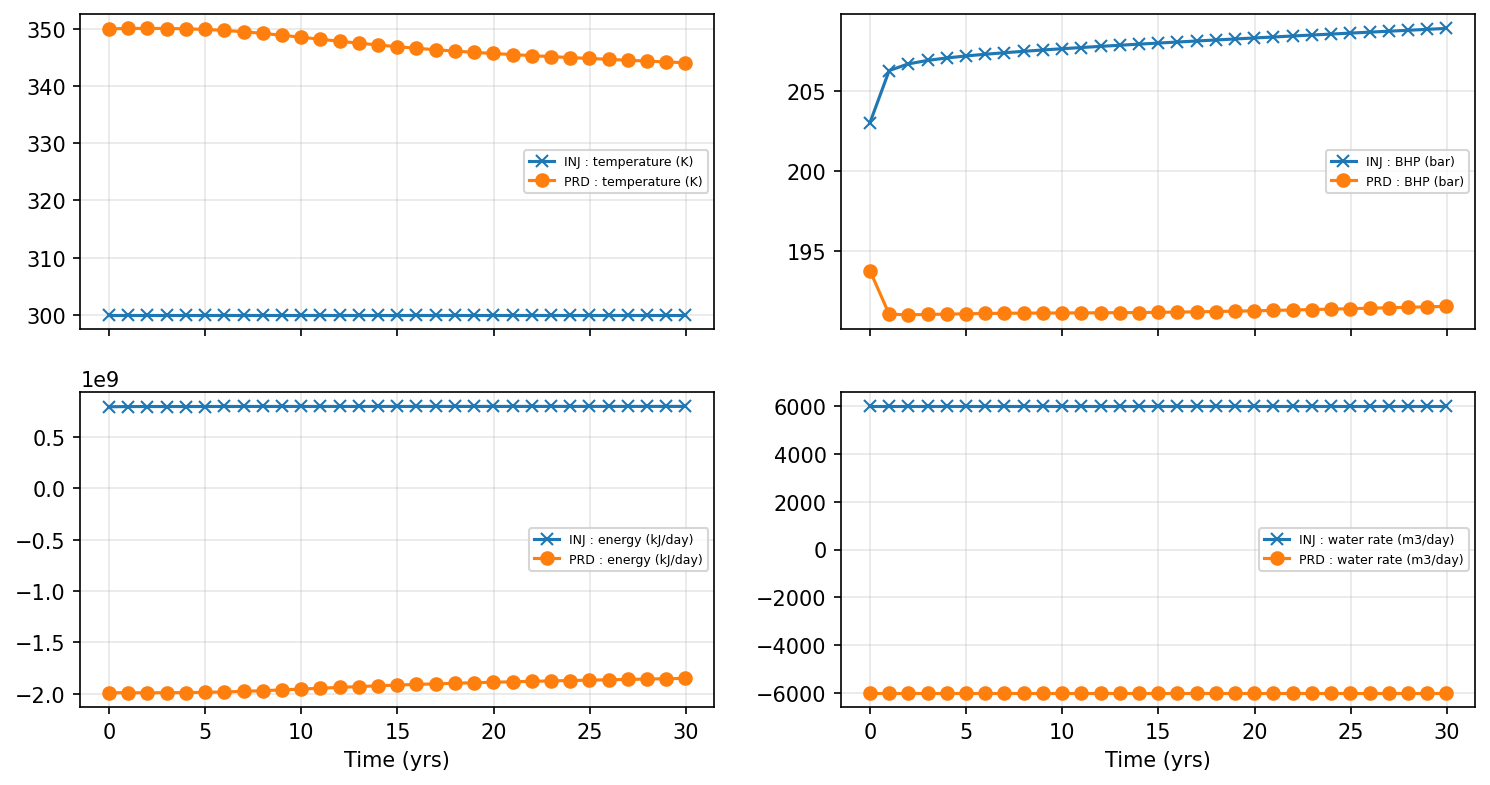

In [110]:
# do a first plot to get an overview of our data
# define a plot
fig, ax = plt.subplots(2,2, figsize=(12,6), dpi=150, sharex=True)
# get plot axes
ax_list = fig.axes

# plot a few keywords in pairs for both wells
for i, key in enumerate(['temperature', 'BHP','energy (kJ/day)','water rate (m3/day)']):
    data.plot(x='Time (yrs)',
              y=data.filter(like=key).columns.tolist(),
              ax=ax_list[i],
              linestyle='-',
              style=['x', 'o'])
    ax_list[i].legend(fontsize=6)
    ax_list[i].grid(alpha=0.3)

plt.show()

In [111]:
# assign datetime as index
data['Datetime'] = pd.to_datetime('1/1/2000') + pd.to_timedelta(
                                        data['Time (yrs)'] * pd.Timedelta(('365 days')), unit='s')
data.set_index('Datetime', inplace=True)


# set the new time interval
set_interval = '365D'

# generate the new index on which the data should correspond based on original index range
resample_index = pd.date_range(data.index[0] - pd.Timedelta(set_interval),
                               data.index[-1] + pd.Timedelta(set_interval), freq=set_interval, normalize=True,
                               inclusive='neither')



In [112]:
# create a new index as the union of the old and new index and interpolate on the combined index
# then reindex the dataframe to the new index
tdata = data.reindex(data.index.union(resample_index)).interpolate('index').reindex(resample_index)

# maintain initial values of original dataset in the newly indexed one at the edges
tdata.iloc[0] = data.iloc[0]
tdata.iloc[-1] = data.iloc[-1]

# add the number of periods for further economic assessment
tdata['econ_periods'] = np.arange(len(tdata))

In [113]:
tdata

,Unnamed: 0,INJ : temperature (K),time,INJ : water rate (m3/day),INJ : steam rate (m3/day),INJ : energy (kJ/day),FIPS c 0 (kmol),PRD : temperature (K),INJ : BHP (bar),PRD : water rate (m3/day),PRD : steam rate (m3/day),PRD : energy (kJ/day),PRD : BHP (bar),Time (yrs),econ_periods
2000-01-01,0.000000,300.0,0.001,6000.0,0.0,7.911871e+08,1.289459e+12,350.024624,203.031016,-6000.000000,0.0,-1.988357e+09,193.769823,0.000003,0
2000-12-31,1.000682,300.0,365.250,6000.0,0.0,7.931116e+08,1.289462e+12,350.098221,206.301462,-6000.000000,0.0,-1.988537e+09,191.036936,1.000000,1
2001-12-31,2.001367,300.0,730.500,6000.0,0.0,7.933583e+08,1.289465e+12,350.106916,206.721431,-6000.000000,0.0,-1.988718e+09,191.000843,2.000000,2
2002-12-31,3.002052,300.0,1095.750,6000.0,0.0,7.934860e+08,1.289468e+12,350.089305,206.938782,-6000.000000,0.0,-1.988320e+09,191.017812,3.000000,3
2003-12-31,4.002737,300.0,1461.000,6000.0,0.0,7.935766e+08,1.289471e+12,350.033799,207.093088,-6000.000000,0.0,-1.987046e+09,191.041417,4.000000,4
2004-12-30,5.003422,300.0,1826.250,6000.0,0.0,7.936496e+08,1.289473e+12,349.925147,207.217381,-6000.000000,0.0,-1.984533e+09,191.063076,5.000000,5
2005-12-30,6.004107,300.0,2191.500,6000.0,0.0,7.937125e+08,1.289476e+12,349.754367,207.324517,-6000.000000,0.0,-1.980560e+09,191.080558,6.000000,6
2006-12-30,7.004792,300.0,2556.750,6000.0,0.0,7.937689e+08,1.289479e+12,349.522319,207.420672,-6000.000000,0.0,-1.975128e+09,191.093503,7.000000,7
2007-12-30,8.005477,300.0,2922.000,6000.0,0.0,7.938209e+08,1.289482e+12,349.234651,207.509206,-6000.000000,0.0,-1.968456e+09,191.102484,8.000000,8
2008-12-29,9.006162,300.0,3287.250,6000.0,0.0,7.938696e+08,1.289485e+12,348.908594,207.592137,-6000.000000,0.0,-1.960880e+09,191.108771,9.000000,9


In [114]:
# compute the deltahours for economic and energy assessments
tdata['Deltahours'] = tdata.index.to_series().diff(1) / pd.Timedelta('1 hour')

# verify that we only have one delta
tdata['Deltahours'].unique()


array([  nan, 8760.])

In [115]:
# recompute time columns based on index
tdata['Time (yrs)'] = pd.to_timedelta(tdata.index - tdata.index[0]).total_seconds() / (365 * 24 * 60 * 60)

# reset index to time delta
tdata.set_index(pd.to_timedelta(tdata['Time (yrs)'] * pd.Timedelta(('365 days')), unit='s'), inplace=True)
tdata.drop(columns='time', inplace=True)

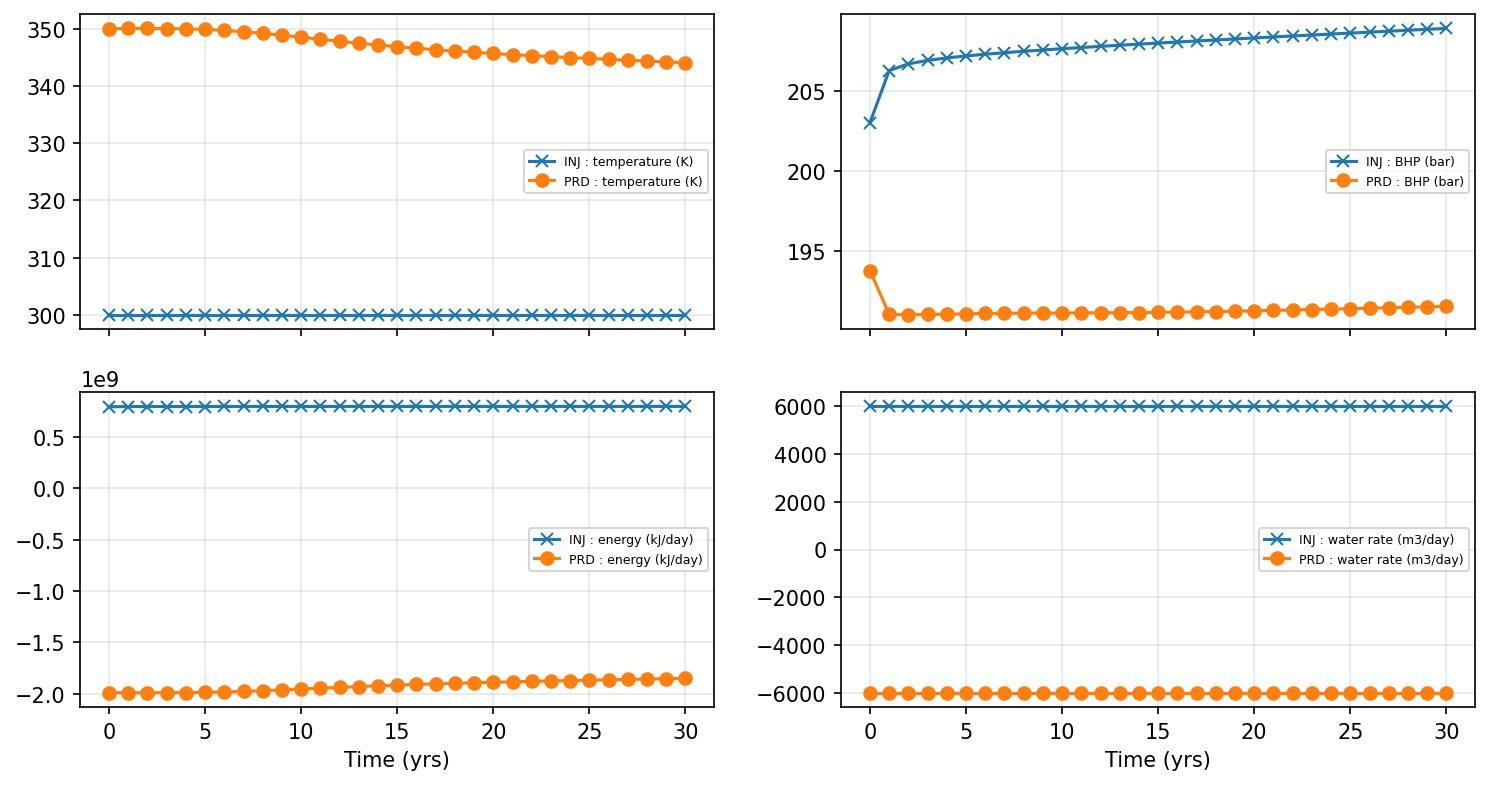

In [116]:
# do a quick plot to get an overview of our treated data
# define a plot
fig, ax = plt.subplots(2,2, figsize=(12,6), dpi=150, sharex=True)
# get plot axes
ax_list = fig.axes

# plot a few keywords in pairs for both wells
for i, key in enumerate(['temperature', 'BHP','energy (kJ/day)','water rate (m3/day)']):
    tdata.plot(x='Time (yrs)',
              y=data.filter(like=key).columns.tolist(),
              ax=ax_list[i],
              linestyle='-',
              style=['x', 'o'])
    ax_list[i].legend(fontsize=6)
    ax_list[i].grid(alpha=0.3)

<Axes: xlabel='Time (yrs)'>

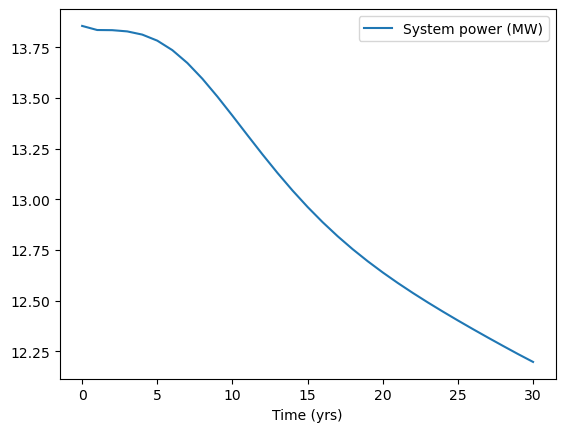

In [117]:
kJ_day_MW = 1/3.6e6/24

# compute system power
tdata['System power (MW)'] = (abs(tdata['PRD : energy (kJ/day)']) - abs(tdata['INJ : energy (kJ/day)']))\
                                       * kJ_day_MW

# compute produced energy
tdata['Produced Energy (MWh)'] = tdata['System power (MW)'] * tdata['Deltahours']

tdata.plot('Time (yrs)', 'System power (MW)')

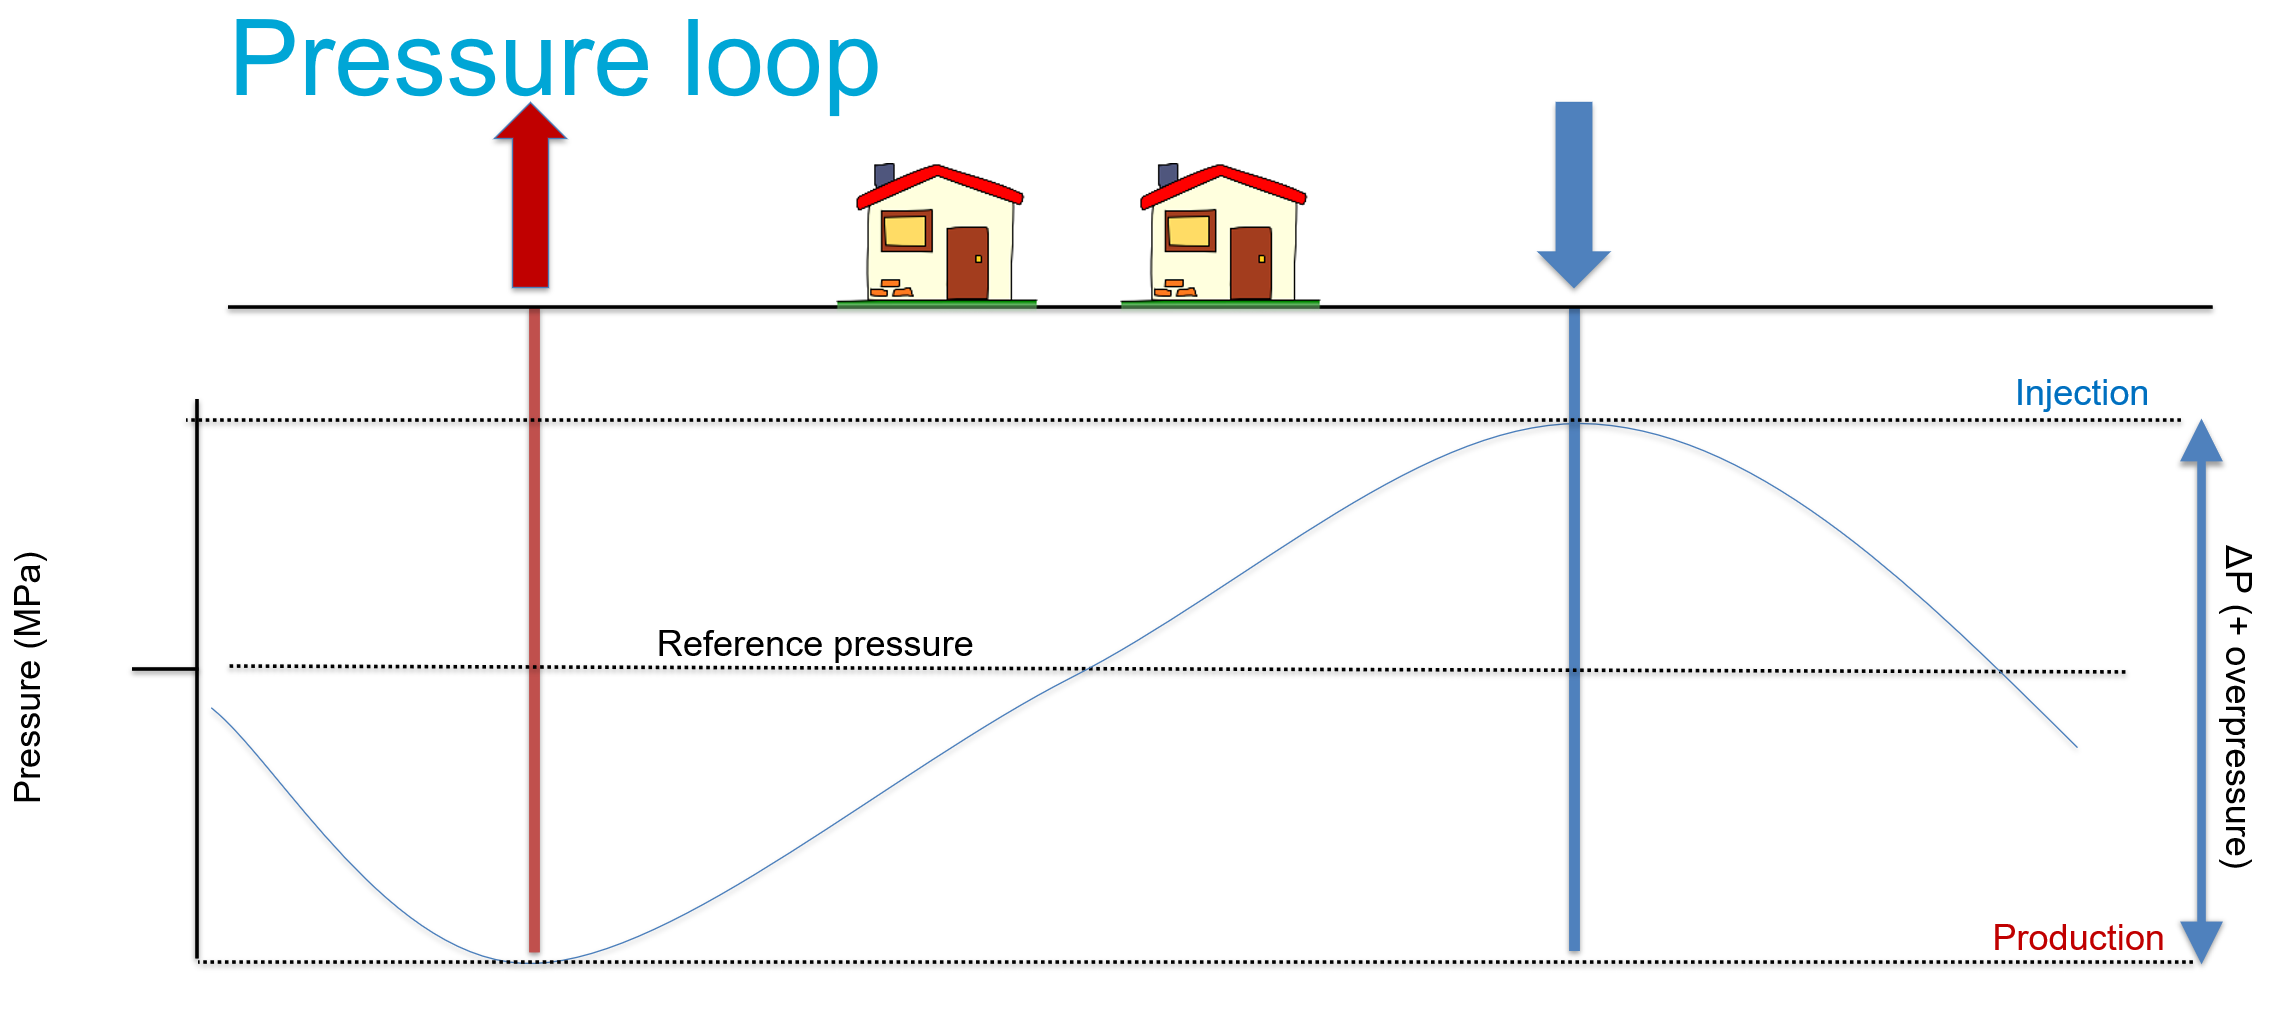

In [118]:
# compute the pressure drop
tdata['Pump dp (MPa)'] = abs(tdata['PRD : BHP (bar)'] * 0.1) - abs(tdata['INJ : BHP (bar)']*0.1)

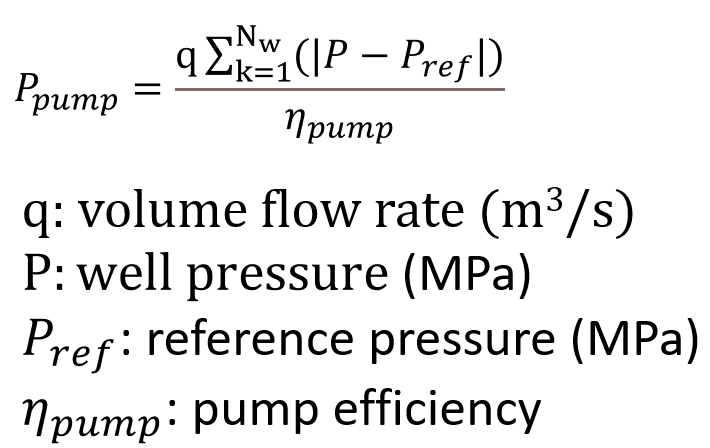

In [119]:
m3_day_m3_sec = 1 / (24 * 60 * 60)
pump_efficiency = 0.5

# compute the pumping power
tdata['Pump power (MW)'] = abs(tdata['Pump dp (MPa)']) * \
                             abs(tdata['INJ : water rate (m3/day)']) * m3_day_m3_sec / pump_efficiency

# compute the pumping costs
electricity_price = 100 # euro/MWh
tdata['OpEx_pump (\u20ac)'] = tdata['Pump power (MW)'] * tdata['Deltahours'] * electricity_price

In [120]:
# assign the CapEx for drilling the wells
tdata['CapEx (\u20ac)'] = 0
tdata.loc[tdata.index == tdata.index[0], 'CapEx (\u20ac)'] = 2 * 4113000

periodic_OpEx_rate = 0.07
# calculate variable OpEx costs
tdata['OpEx (\u20ac)'] = tdata['CapEx (\u20ac)'].cumsum() * periodic_OpEx_rate



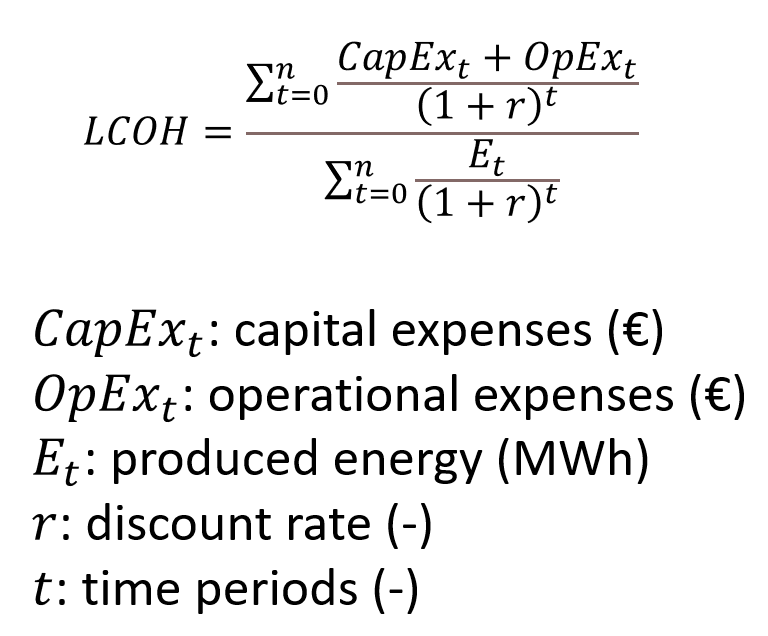

In [121]:
# Calculate LCOH

#assign discount rate
periodic_discount_rate = 0.05


# compute LCOH cost
tdata['LCOH costs'] = tdata['CapEx (\u20ac)'].fillna(0) \
                        + tdata['OpEx (\u20ac)'] \
                        + tdata['OpEx_pump (\u20ac)'].fillna(0)

# discount LCOH costs
tdata['discounted LCOH costs'] = (tdata['LCOH costs'] / 
                                 (1+periodic_discount_rate)**tdata['econ_periods']).cumsum()

tdata['discounted LCOH energy'] = (tdata['Produced Energy (MWh)'] /
                                  (1+periodic_discount_rate)**tdata['econ_periods']).cumsum()

tdata[r'LCOH (€/MWh)'] = tdata['discounted LCOH costs'] / tdata['discounted LCOH energy']




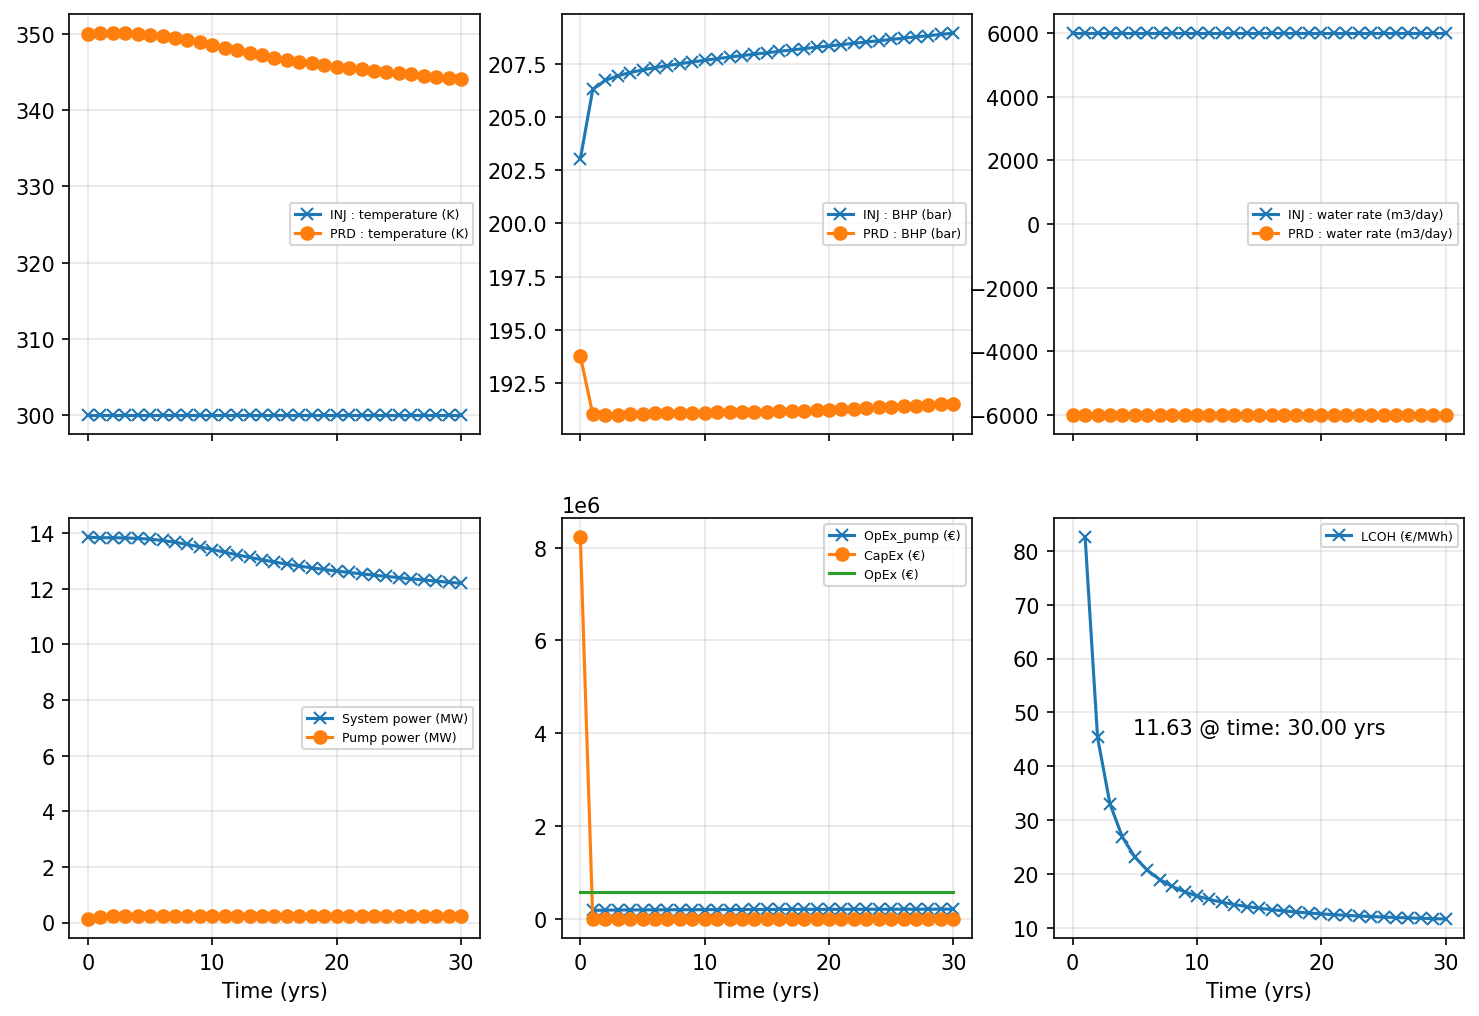

In [122]:
# do our final plot with the overview
# define a plot
fig, ax = plt.subplots(2,3, figsize=(12,8), dpi=150, sharex=True)
# get plot axes
ax_list = fig.axes

# plot a few keywords in pairs for both wells
for i, key in enumerate(['temperature', 'BHP','water rate (m3/day)',
                         'power', 'Ex','LCOH (€/MWh)']):
    tdata.plot(x='Time (yrs)',
              y=tdata.filter(like=key).columns.tolist(),
              ax=ax_list[i],
              linestyle='-',
              style=['x', 'o'])
    ax_list[i].legend(fontsize=6)
    ax_list[i].grid(alpha=0.3)
    if key == 'LCOH (€/MWh)':
        ax_list[i].annotate('%0.2f @ time: %.2f yrs' % (tdata[key].iloc[-1], tdata['Time (yrs)'].iloc[-1]),
                            xy=(0.5, 0.5), va='center', ha='center',
                            xycoords=('axes fraction'))

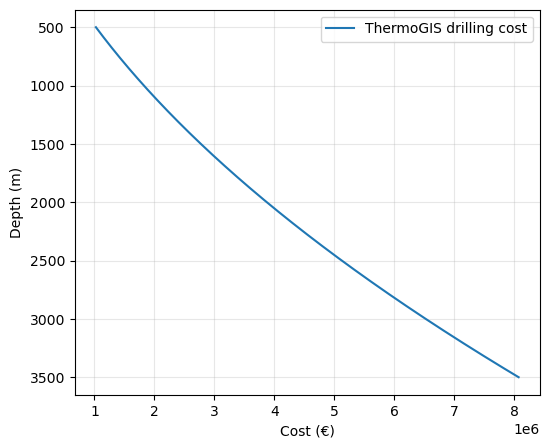

In [123]:
def drillingcostnl(depth):
    """
    Calculate the cost of drilling as a function of depth
    Reference source:
        https://www.thermogis.nl/en/economic-model

    :param depth: float
        measured depth along hole in meters

    :return: float
        costs in euros
    """
    drilling_cost_nl = 375000 + 1150 * depth + 0.3 * depth ** 2
    return(drilling_cost_nl)

depth = np.arange(500, 3500, 1)
costs = drillingcostnl(depth)

fig, ax = plt.subplots(figsize=(6,5))
ax.plot(costs, depth, label='ThermoGIS drilling cost')
ax.set_xlabel('Cost (€)')
ax.set_ylabel('Depth (m)')
ax.grid(alpha=0.3)
ax.legend()
ax.invert_yaxis()

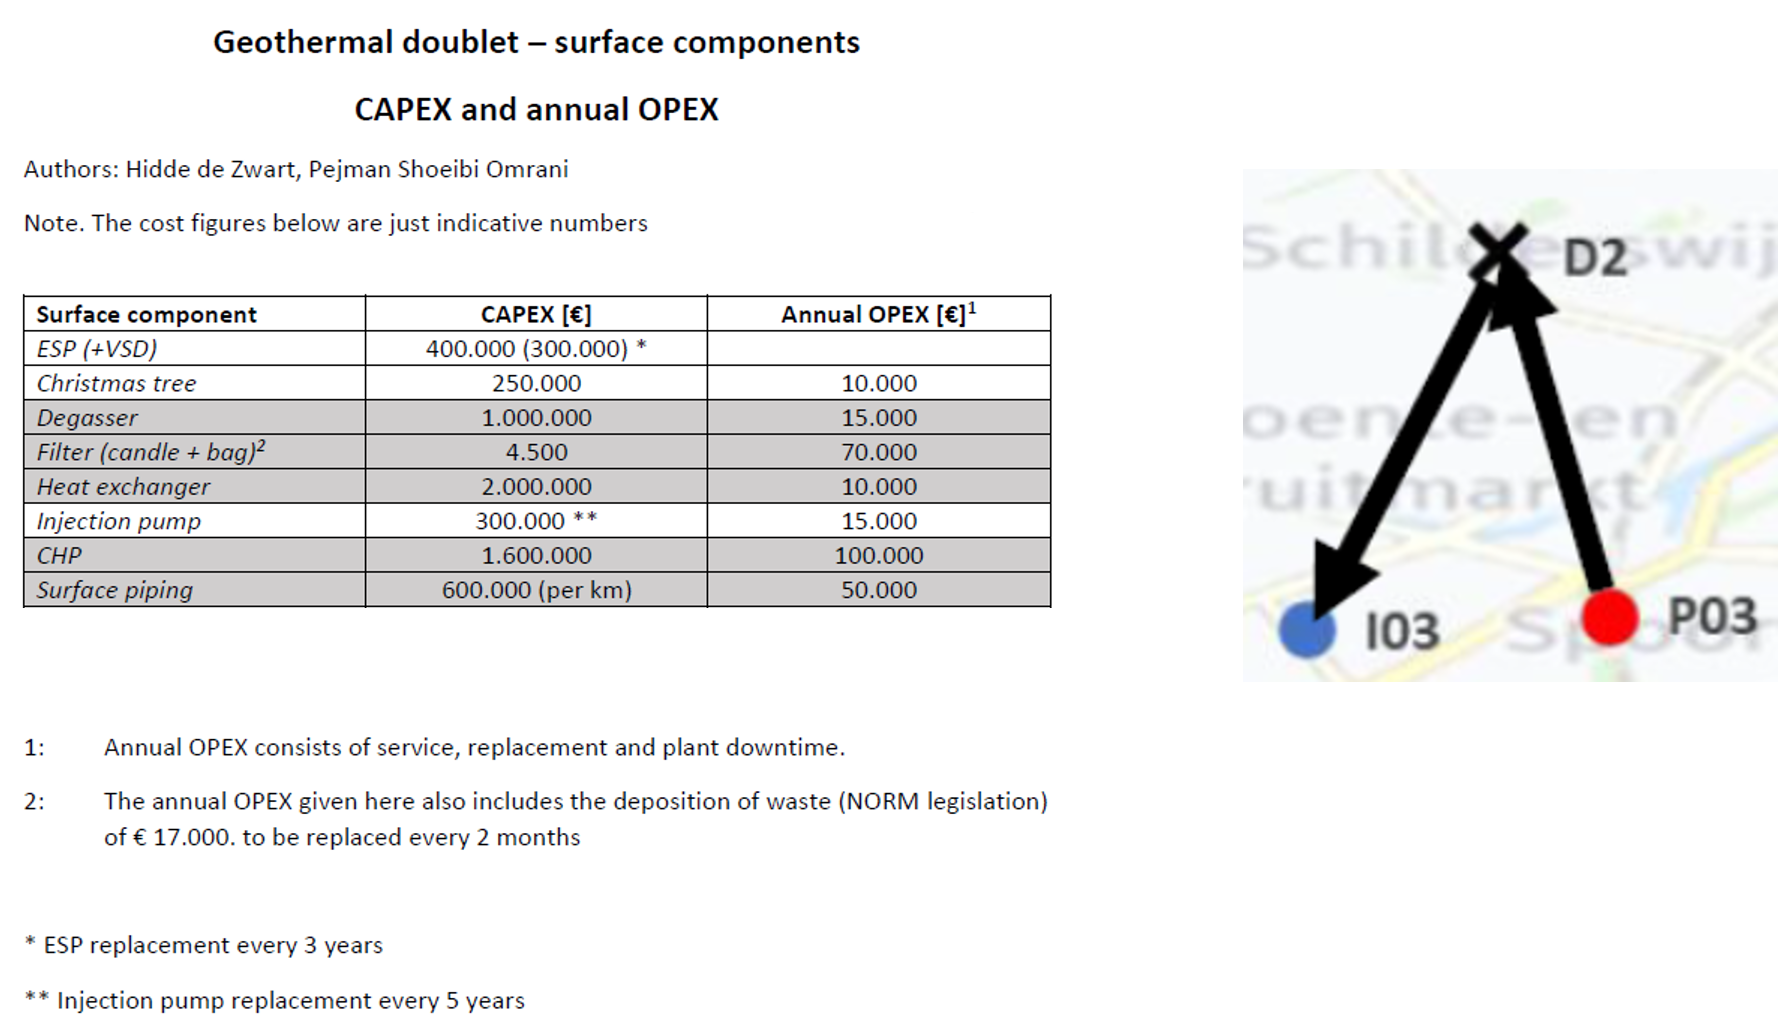